# BLEで近くにあるデバイスの情報を取得する

In [8]:
data = []

def process(_dict):
    data.append(_dict)
    print(_dict)

from corebluetooth.core_bluetooth import  CBCentralManagerEx

# CentralManagerを検索すると、Bluetooth動作が開始される（少し時間がかかる）
# "CBCentralManagerStatePoweredOn"となると、使うことができるようになる
myCBCentralManager = CBCentralManagerEx(process)

CBCentralManagerStatePoweredOn


In [9]:
import time

myCBCentralManager.scanForPeripherals() # サーチ開始
time.sleep(10)                # 一定時間サーチし続ける
myCBCentralManager.stopScan() # サーチ終了

{
    kCBAdvDataIsConnectable = 1;
    kCBAdvDataRxPrimaryPHY = 0;
    kCBAdvDataRxSecondaryPHY = 0;
    kCBAdvDataTimestamp = "702007921.255658";
    kCBAdvDataTxPowerLevel = 12;
}
{'RSSI': -66.0, 'peripheral': {'name': None, 'identifier': <b'__NSConcreteUUID': 2990E31E-9CEA-8BD7-8AE3-7A7031163F97>}, 'AdvDataTxPowerLevel': 12.0}
{
    kCBAdvDataIsConnectable = 0;
    kCBAdvDataManufacturerData = {length = 28, bytes = 0x2d010200 01101a8b 7560d6cf 4e958f11 ... b97059df 9257ae5c };
    kCBAdvDataRxPrimaryPHY = 0;
    kCBAdvDataRxSecondaryPHY = 0;
    kCBAdvDataTimestamp = "702007921.451393";
}
{'RSSI': -85.0, 'peripheral': {'name': None, 'identifier': <b'__NSConcreteUUID': 86B548CC-CA4A-A4E8-5AB1-8CA836C589A3>}, 'AdvDataManufacturerData': b'-\x01\x02\x00\x01\x10\x1a\x8bu`\xd6\xcfN\x95\x8f\x113]\x07\x08\xb9pY\xdf\x92W\xae\\', 'AdvDataManufacturerDataStr': '2d01020001101a8b7560d6cf4e958f11335d0708b97059df9257ae5c'}
{
    kCBAdvDataIsConnectable = 1;
    kCBAdvDataRxPrimaryPHY = 0;
    kCBA

In [3]:
print(data)

[{'RSSI': -87.0, 'peripheral': {'name': None, 'identifier': <b'__NSConcreteUUID': 426FBC98-6EB1-80EB-D565-A70077F260F9>}}, {'RSSI': -48.0, 'peripheral': {'name': <b'__NSCFString': MacBook Pro>, 'identifier': <b'__NSConcreteUUID': AA417896-B948-2838-0570-799CBE55F638>}}, {'RSSI': -48.0, 'peripheral': {'name': <b'__NSCFString': MacBook Pro>, 'identifier': <b'__NSConcreteUUID': AA417896-B948-2838-0570-799CBE55F638>}}, {'RSSI': -63.0, 'peripheral': {'name': None, 'identifier': <b'__NSConcreteUUID': 2990E31E-9CEA-8BD7-8AE3-7A7031163F97>}, 'AdvDataTxPowerLevel': 12.0}, {'RSSI': -47.0, 'peripheral': {'name': <b'NSTaggedPointerString': iPhone>, 'identifier': <b'__NSConcreteUUID': 103AD23A-0FFC-15E6-902E-F760D47E7B3C>}, 'AdvDataTxPowerLevel': 6.0}, {'RSSI': -54.0, 'peripheral': {'name': None, 'identifier': <b'__NSConcreteUUID': ACBF1E0E-8688-D5D3-4B9D-68D213E77A0B>}, 'AdvDataManufacturerData': b'\xe8\xee\xcc>\xe4\x80\x00\x00', 'AdvDataManufacturerDataStr': 'e8eecc3ee4800000'}, {'RSSI': -82.0, '

In [10]:
cites = []
for datum in data:
    if 'AdvDataTxPowerLevel' in datum is not None:
        distance = (100+datum["RSSI"]) / datum['AdvDataTxPowerLevel']
        cites.append({
            "power":    datum['AdvDataTxPowerLevel'],
            "distance": distance,
            "name":     datum['peripheral']['name'] })
print(cites)

[{'power': 12.0, 'distance': 2.8333333333333335, 'name': None}, {'power': 6.0, 'distance': 8.333333333333334, 'name': <b'NSTaggedPointerString': iPhone>}, {'power': 12.0, 'distance': 4.75, 'name': None}, {'power': 12.0, 'distance': 4.75, 'name': None}, {'power': 12.0, 'distance': 4.166666666666667, 'name': None}, {'power': 12.0, 'distance': 4.083333333333333, 'name': None}]


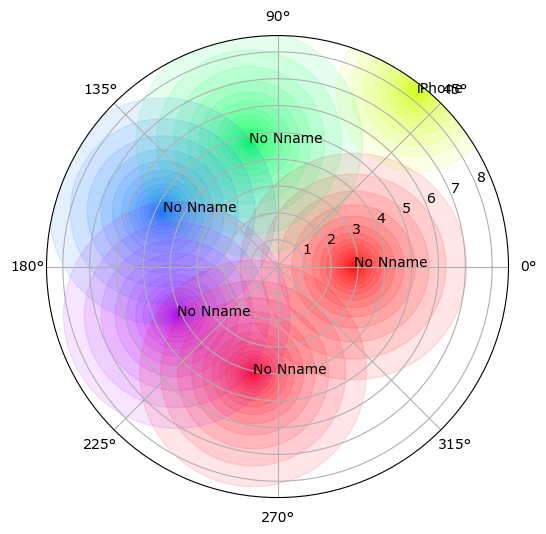

In [25]:
import numpy as np
import math
import matplotlib.pyplot as plt

step = 2 * math.pi / (len(cites)+1)
rads = [ i * step for i in range(len(cites))]
rs =   [ cites[i]["distance"] for i in range(len(cites))]
area = np.array([ cites[i]["power"] for i in range(len(cites))])
labels = [ cites[i]["name"] if cites[i]["name"] else "No Name" for i in range(len(cites))]
colors = rads

fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111, projection='polar')
for i in range(20):
    ax.scatter(rads, rs, c = colors, s = area*1.5**i, cmap='hsv', alpha = 0.1)
for i in range(len(cites)):
    ax.text(rads[i], rs[i], labels[i])